<a href="https://colab.research.google.com/github/ibonetc/IA_2024/blob/main/Heur%C3%ADstica_AlgoritmosB%C3%BAsqueda/IA_BusquedaHeuristica_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pydot
from IPython.display import Image, display
import queue
import numpy as np

## Clase Node, para representar los nodos del árbol de búsqueda

Esta clase, es una clase general para represetar el problema y a la vez los nodos de un árbol.

Para un problema específico se creará una clase que herede de esta.

Tiene como atributos o propiedades:
-  **state**: estado del nodo, que en dependencia del problema debe tener una representación específica
- **value**: este atributo puede servir para darle un valor(id) que identifique a cada nodo
- **children**: es un arreglo de los nodos hijos
- **parent**: El padre, o sea, el nodo que lo generó
- **operator**: El operador que lo generó
- **operators**: Los posibles operadores a aplicar (aunque en este caso, para saber el número del operdor, es una lista con todos los operados)
- **objective**: estado objetivo a llegar
- **level**: El nivel de profundidad del nodo, en el árbol

Como métodos se tienen:
- **add_child**: Que adiciona un hijo en la lista children, en este caso se pasan los parámetros del nodo, éste se crea y se adiciona a la lista.

- **add_node_child**: Parecido al anterior, sólo que se pasa como parámetro el nodo ya creado y sólo se adiciona a la lista children.

- **getchildrens**: Método que devuelve la lista de hijos al aplicar los operadores.

- **getState**: Método abstracto que deben implementar los problemas que hereden de Node, para definir lo que hace cada uno de los operadores. Este método devuelve el estado que se obtiene al aplicar el operador en la posición index del arreglo operators.

- **repeatStatePath**: Este método devuelve un booleano en dependencia de si el estado que se pasa está ya en el camino a la raíz. Verdadero si está, Falso sin no está. Esto es para evitar ciclos y caminos infinitos.

- **pathObjective**: Este método devuelve el camino hasta la raíz. Útil para buscar el camino cuando se encuentra el estado objetivo.

- **heuristic**: Este método se debe definir en las clases que hereden de ésta, definiendo el cálculo de la heurística en cada estado (nodo).

- **cost**:  Este método también debe definirse en las clases que hereden de ésta, definiendo el costo de cada operador para generar un nuevo estado.

- **f**: Esta es la función f usada en el algoritmo A* que es la suma del costo y la heurística (cost + heuristic)

In [ ]:
class Node ():
  def __init__(self, state,value,operators,operator=None, parent=None,objective=None):
    self.state= state
    self.value = value
    self.children = []
    self.parent=parent
    self.operator=operator
    self.objective=objective
    self.level=0
    self.operators=operators


  def add_child(self, value, state, operator):
    node=type(self)(value=value, state=state, operator=operator,parent=self,operators=self.operators)
    node.level=node.parent.level+1
    self.children.append(node)
    return node

  def add_node_child(self, node):
    node.level=node.parent.level+1
    self.children.append(node)
    return node

  #Devuelve todos los estados según los operadores aplicados
  def getchildrens(self):
    return [
        self.getState(i)
          if not self.repeatStatePath(self.getState(i))
            else None for i, op in enumerate(self.operators)]

  def getState(self, index):
    pass

  def __eq__(self, other):
    return self.state == other.state

  def __lt__(self, other):
    return self.f() < other.f()


  def repeatStatePath(self, state):
      n=self
      while n is not None and n.state!=state:
          n=n.parent
      return n is not None

  def pathObjective(self):
      n=self
      result=[]
      while n is not None:
          result.append(n)
          n=n.parent
      return result

  def heuristic(self):
    return 0

  def cost(self):
    return 1

  def f(self):
    return self.cost()+self.heuristic()

## Class Tree (La clase árbol)
Esta clase es la clase general de cualquier árbol, con los métodos de búsquedas y dibujo que necesite.

Debe tener la raíz del árbol y los operadores que pueda ejecutar el problema
- **root**: Nodo raíz de tipo Node
- **operators**: Los posibles operadores a aplicar (aunque en este caso, para saber el número del operdor, es una lista con todos los operados)

Como métodos tiene:

- **printPath**: Dado un nodo devuelve el camino desde al raíz hasta él. Sirve para dado el nodo objetivo generado en el árbol, devolver el camino solución.

- **breadthFirst** : Primero a lo ancho, devuelve el nodo final, que con el método *printPath* puede imprimirse el camino solución

- **dephFirst** : Primero en profundidad.

- **bestFirst** : Método heurístico primero el mejor

- **Aasterisk** : Método heurístico A*, basado en costo y heurística

- **draw** : Método para dibujar el árbol utilizando un grafo

In [ ]:
class Tree ():
  def __init__(self, root ,operators):
    self.root=root
    self.operators=operators

  def printPath(self,n):
    stack=n.pathObjective()
    path=stack.copy()
    while len(stack)!=0:
        node=stack.pop()
        if node.operator is not None:
            print(f'operador:  {self.operators[node.operator]} \t estado: {node.state}')
        else:
            print(f' {node.state}')
    return path

  def reinitRoot(self):
    self.root.operator=None
    self.root.parent=None
    self.root.objective=None
    self.root.children = []
    self.root.level=0

  ## Primero a lo ancho
  def breadthFirst(self,endState):
    self.reinitRoot()
    pq=queue.Queue()
    pq.put(self.root)
    while not pq.empty():
      node=pq.get()
      children=node.getchildrens()
      for i,child in enumerate(children):
        if child is not None:
          newChild=node.add_child(value=node.value+'-'+str(i), state=child, operator=i)
          pq.put(newChild)
          if endState==child:
            return newChild

  ## Primero en profundidad
  def dephFirst(self, endState):
    self.reinitRoot()
    pq=[]
    pq.append(self.root)
    while len(pq)>0:
      node=pq.pop()
      if (node.parent is not None):
        node.parent.add_node_child(node)
      children=node.getchildrens()
      temp=[]
      for i,child in enumerate(children):
        if child is not None:
          newChild=type(self.root)(value=node.value+'-'+str(i),state=child,operator=i,parent=node, operators=node.operators)
          temp.append(newChild)
          if endState==child:
            node.add_node_child(newChild)
            return newChild
      #Adicionar los hijos en forma inversa para que salga primero el primero que se adicionó
      temp.reverse()
      for e in temp:
        pq.append(e)

  ## Costo uniforme
  def costUniform(self,endState):
    self.reinitRoot()
    pq=queue.PriorityQueue()
    pq.put((self.root.cost(),self.root))
    while not pq.empty():
      node=pq.get()[1]
      children=node.getchildrens()
      for i,child in enumerate(children):
        if child is not None:
          newChild=node.add_child(value=node.value+'-'+str(i),
                                  state=child, operator=i)
          pq.put((newChild.cost(),newChild))
          if endState==child:
            return newChild

  ## Primero el mejor
  def bestFirst(self,endState):
    self.reinitRoot()
    pq=queue.PriorityQueue()
    pq.put((self.root.heuristic(),self.root))
    while not pq.empty():
      node=pq.get()[1]
      children=node.getchildrens()
      for i,child in enumerate(children):
        if child is not None:
          newChild=node.add_child(value=node.value+'-'+str(i),
                                  state=child, operator=i)
          pq.put((newChild.heuristic(),newChild))
          if endState==child:
            return newChild

  ## A*
  def Aasterisk(self,endState):
    self.reinitRoot()
    pq=queue.PriorityQueue()
    pq.put((self.root.f(),self.root))
    while not pq.empty():
      node=pq.get()[1]
      children=node.getchildrens()
      for i,child in enumerate(children):
        if child is not None:
          newChild=node.add_child(value=node.value+'-'+str(i),
                                  state=child, operator=i)
          pq.put((newChild.f(),newChild))
          if endState==child:
            return newChild

  ## Método para dibujar el árbol
  def draw(self,path):
    graph = pydot.Dot(graph_type='graph')
    nodeGraph=pydot.Node(str(self.root.state)+"-"+str(0),
                          label=str(self.root.state),shape ="circle",
                          style="filled", fillcolor="red")
    graph.add_node(nodeGraph)
    path.pop()
    return self.drawTreeRec(self.root,nodeGraph,graph,0,path.pop(),path)
  ## Método recursivo para dibujar el árbol
  def drawTreeRec(self,r,rootGraph,graph,i,topPath,path):
    if r is not None:
      children=r.children
      for j,child in enumerate(children):
        i=i+1
        color="white"
        if topPath.value==child.value:
          if len(path)>0:topPath=path.pop()
          color='red'
        c=pydot.Node(child.value,label=str(child.state)+r"\n"+r"\n"+"f="+str(child.f()),
                      shape ="circle", style="filled",
                      fillcolor=color)
        graph.add_node(c)
        graph.add_edge(pydot.Edge(rootGraph, c,
                                  label=str(child.operator)+'('+str(child.cost())+')'))
        graph=self.drawTreeRec(child,c,graph,i,topPath,path)  # recursive call
      return graph
    else:
      return graph

## Ejemplos

### Ejemplo de las jarras
Se tiene una jarra de 4L y una de 3L, las jarras no tienen medidas ni forma de medir la cantidad, sólo se puede saber la medida a la máxima capacidad.
Se cuenta con un vertedero y una llave de agua. Las jarras se pueden llenar hasta la máxima capacidad, vaciar o trasvasar de una a otra.
Se quiere obtener 2L en la jarra de 4L.

Teniendo en cuenta este problema, se puede definir el estado como:
**(cantidad jarra de 3L, cantidad jarra de 4L)**

Y los operadores como:

>0-  llenar jarra de 3 litros

>1-  llenar jarra de 4 litros

>2-  vaciar jarra de 3 litros

>3-  vaciar jarra de 4 litros

>4-  trasvasar de 3L a 4L

>5-  trasvasar de 4L a 3L


Aquí se implementa el método **getState** para definir la acción en cada operador, o sea, cuáles son los estados después de aplicar cada operador. Se devuelve el resultado para el operador en la posición index.

In [ ]:
class Jarra(Node):

  def getState(self, index):
    state=self.state
    nextState=None
    if index==0:
      if state[0]<3:
        nextState=[3,state[1]]
      else:
        nextState=None
    elif index==1:
      if state[1]<4:
        nextState=[state[0],4]
      else:
        nextState=None
    elif index==2:
      if state[0]>0:
        nextState=[0,state[1]]
      else:
        nextState=None
    elif index==3:
      if state[1]>0:
        nextState=[state[0],0]
      else:
        nextState=None
    elif index==4: nextState=self.trasvasar3L4L(state)
    elif index==5: nextState=self.trasvasar4L3L(state)
    return nextState if state!=nextState else None

  def trasvasar4L3L(self, state):
    t=min(3-state[0],state[1])
    return [state[0]+t,state[1]-t]

  def trasvasar3L4L(self, state):
    t=min(state[0],4-state[1])
    return [state[0]-t,state[1]+t]

  #Costo acumulativo(valor 1 en cada nivel)
  def cost(self):
    return self.level

  def heuristic(self):
    r1=abs(objective.state[0]-self.state[0])+abs(objective.state[1]-self.state[1])
    return r1

Se definen además las variables de:

operadores
estado inicial
estado final

In [ ]:
operators=['0- llenar jarra de 3 litros','1- llenar jarra de 4 litros',
           '2- vaciar jarra de 3 litros',
           '3- vaciar jarra de 4 litros',
           '4- trasvasar de 3-4',
           '5- trasvasar de 4-3']
initState=[0,0]
endState=[0,2]

#### Primero a lo ancho

 [0, 0]
operador:  0- llenar jarra de 3 litros 	 estado: [3, 0]
operador:  4- trasvasar de 3-4 	 estado: [0, 3]
operador:  0- llenar jarra de 3 litros 	 estado: [3, 3]
operador:  4- trasvasar de 3-4 	 estado: [2, 4]
operador:  3- vaciar jarra de 4 litros 	 estado: [2, 0]
operador:  4- trasvasar de 3-4 	 estado: [0, 2]


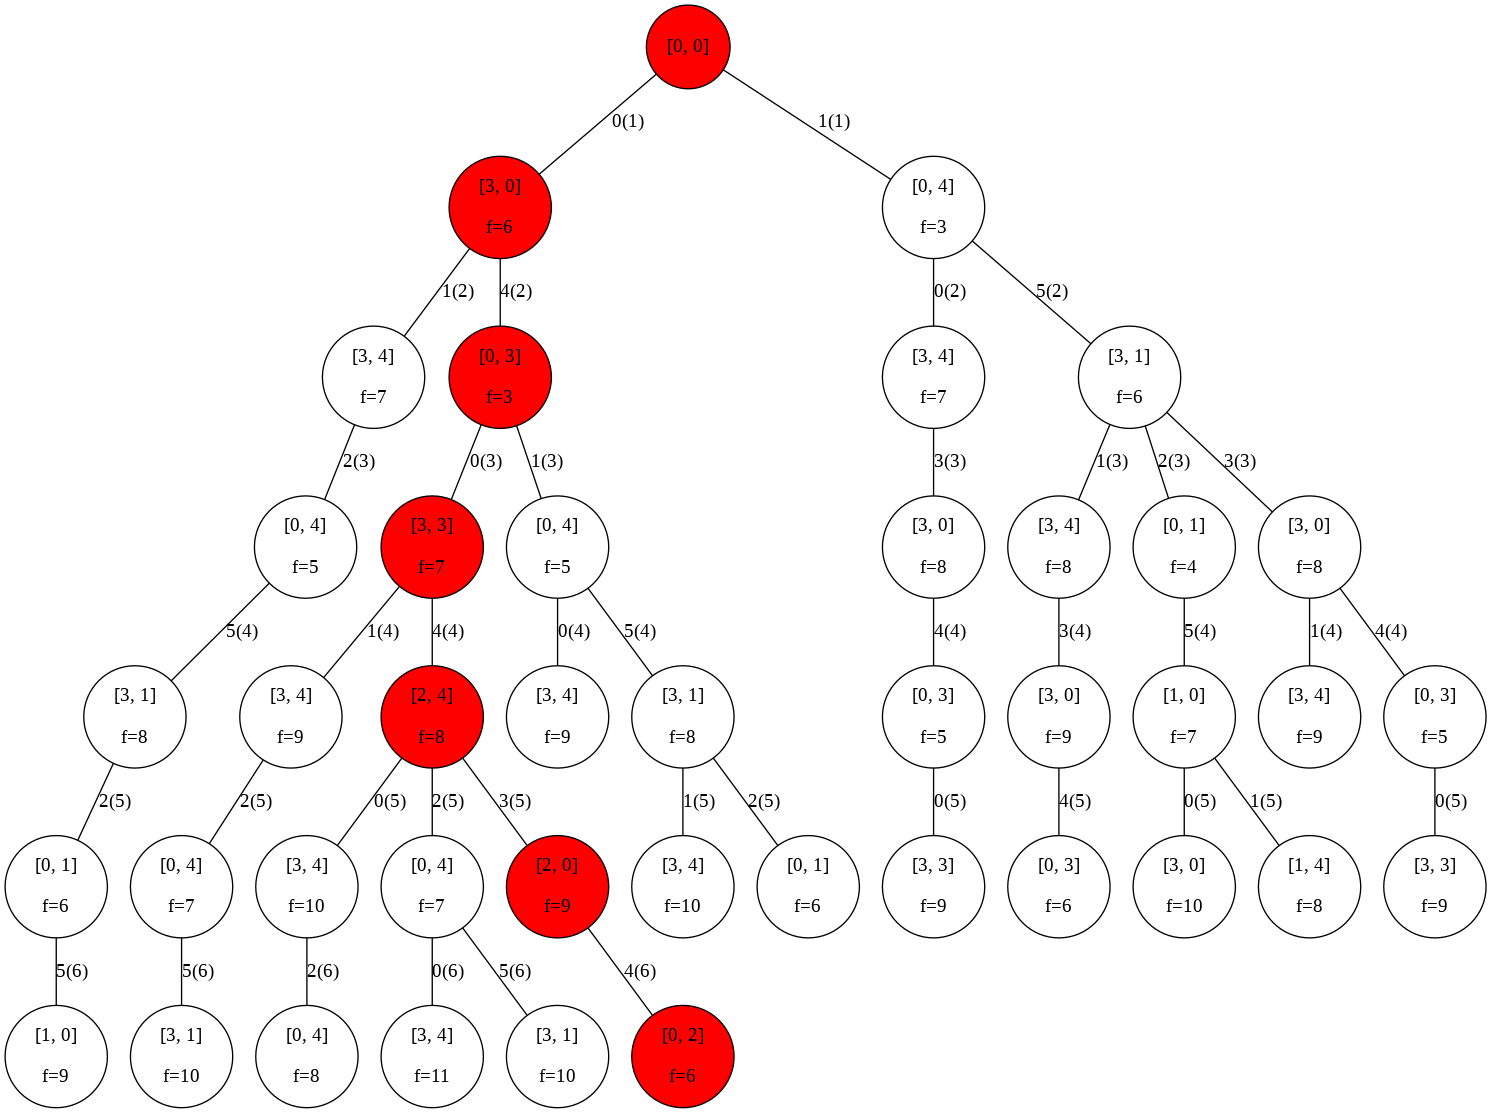

In [ ]:
jarraInicio=Jarra(value="inicio",state=initState, operators=operators)
problemaJarras= Tree(jarraInicio,operators)
objective=problemaJarras.breadthFirst(endState)
path=problemaJarras.printPath(objective)
graph=problemaJarras.draw(path.copy())
tree_image = Image(graph.create_png(), width=900, height=700)
display(tree_image)

#### Primero en profundidad

 [0, 0]
operador:  0- llenar jarra de 3 litros 	 estado: [3, 0]
operador:  1- llenar jarra de 4 litros 	 estado: [3, 4]
operador:  2- vaciar jarra de 3 litros 	 estado: [0, 4]
operador:  5- trasvasar de 4-3 	 estado: [3, 1]
operador:  2- vaciar jarra de 3 litros 	 estado: [0, 1]
operador:  5- trasvasar de 4-3 	 estado: [1, 0]
operador:  1- llenar jarra de 4 litros 	 estado: [1, 4]
operador:  5- trasvasar de 4-3 	 estado: [3, 2]
operador:  2- vaciar jarra de 3 litros 	 estado: [0, 2]


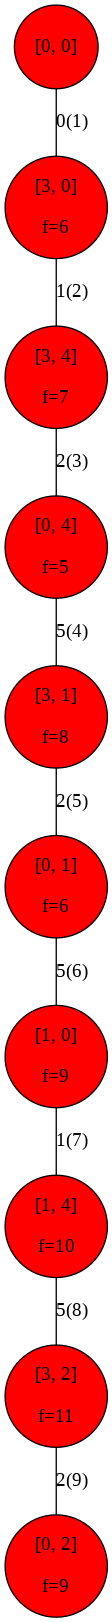

In [ ]:
objective=problemaJarras.dephFirst(endState)
path=problemaJarras.printPath(objective)
graph=problemaJarras.draw(path.copy())
tree_image = Image(graph.create_png(), width=100, height=700)
display(tree_image)

#### Primero el mejor

 [0, 0]
operador:  1- llenar jarra de 4 litros 	 estado: [0, 4]
operador:  5- trasvasar de 4-3 	 estado: [3, 1]
operador:  2- vaciar jarra de 3 litros 	 estado: [0, 1]
operador:  5- trasvasar de 4-3 	 estado: [1, 0]
operador:  1- llenar jarra de 4 litros 	 estado: [1, 4]
operador:  5- trasvasar de 4-3 	 estado: [3, 2]
operador:  2- vaciar jarra de 3 litros 	 estado: [0, 2]


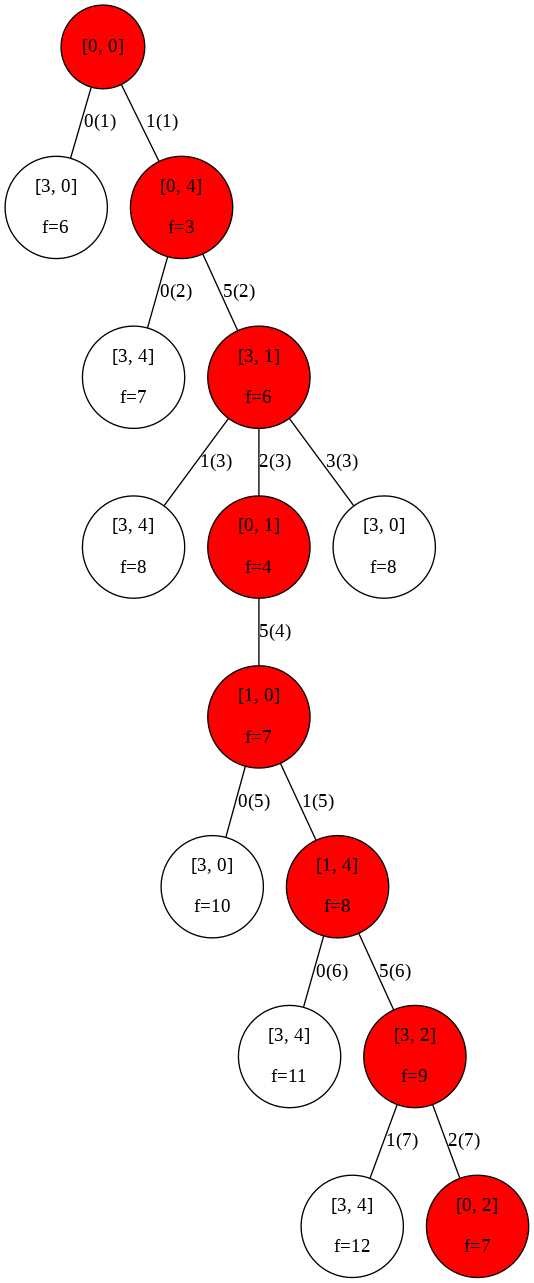

In [ ]:
objective=problemaJarras.bestFirst(endState)
path=problemaJarras.printPath(objective)
graph=problemaJarras.draw(path.copy())
tree_image = Image(graph.create_png(), width=300, height=600)
display(tree_image)

#### A*

 [0, 0]
operador:  0- llenar jarra de 3 litros 	 estado: [3, 0]
operador:  4- trasvasar de 3-4 	 estado: [0, 3]
operador:  0- llenar jarra de 3 litros 	 estado: [3, 3]
operador:  4- trasvasar de 3-4 	 estado: [2, 4]
operador:  3- vaciar jarra de 4 litros 	 estado: [2, 0]
operador:  4- trasvasar de 3-4 	 estado: [0, 2]


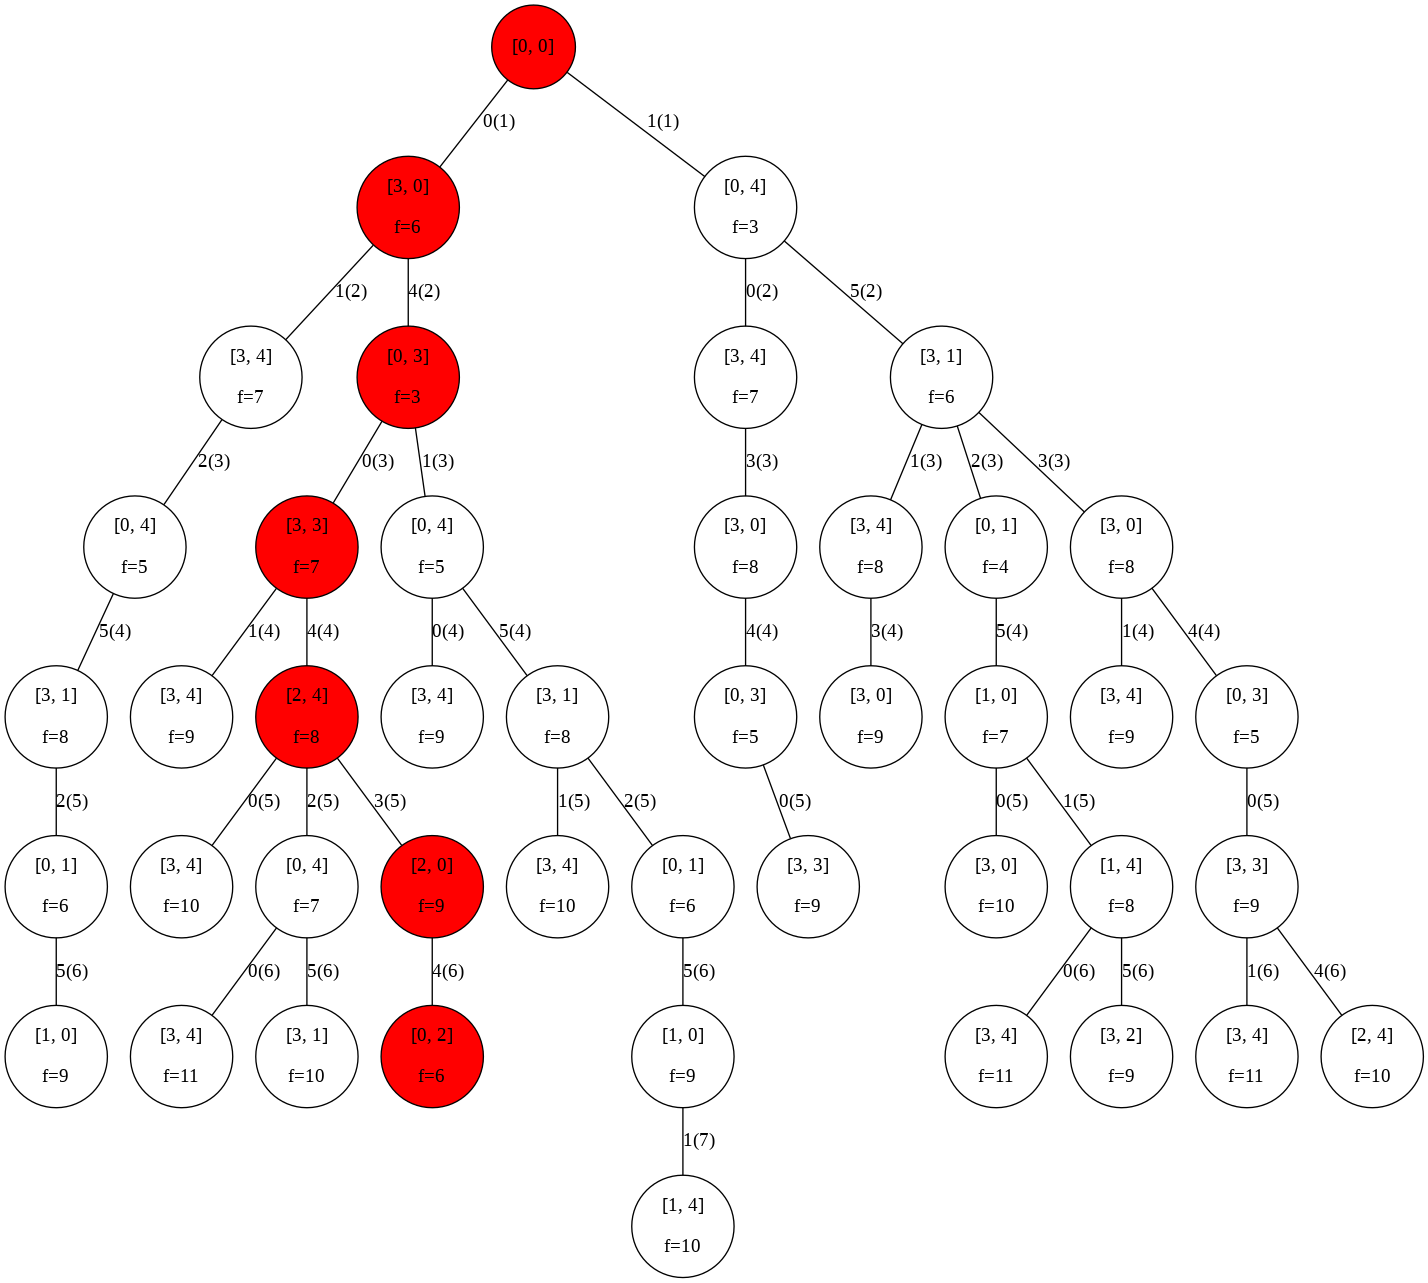

In [ ]:
objective=problemaJarras.Aasterisk(endState)
path=problemaJarras.printPath(objective)
graph=problemaJarras.draw(path.copy())
tree_image = Image(graph.create_png(), width=800, height=700)
display(tree_image)

### Ejemplo del mapa de ciudades
Utilizando el ejemplo clásico del mapa de Romania, encontrar el camino más corto de Arad a Bucharest.

Se tiene *romania_map*, que es la distancia entre cada una de las ciudades adyacentes.

En este problema esta distancia es el costo de los operadores.

Cada nodo tiene tantos operadores como ciudades adyacentes tiene, y el operador es moverse a una nueva ciudad.

El estado de este problema puede definirse como el nombre de la ciudad.

Se tienen las adyacencias entre las ciudades en una variable tipo dict. De esta manera se puede saber cuáles son los próximos operadores válidos, o sea a qué ciudades se puede mover.


In [ ]:
romania_map=dict(
    Arad=dict(Zerind=75, Sibiu=140, Timisoara=118),
    Bucharest=dict(Urziceni=85, Pitesti=101, Giurgiu=90, Fagaras=211),
    Craiova=dict(Drobeta=120, Rimnicu=146, Pitesti=138),
    Drobeta=dict(Mehadia=75),
    Eforie=dict(Hirsova=86),
    Fagaras=dict(Sibiu=99),
    Hirsova=dict(Urziceni=98),
    Iasi=dict(Vaslui=92, Neamt=87),
    Lugoj=dict(Timisoara=111, Mehadia=70),
    Oradea=dict(Zerind=71, Sibiu=151),
    Pitesti=dict(Rimnicu=97),
    Rimnicu=dict(Sibiu=80),
    Urziceni=dict(Vaslui=142))

En una estructura como esta para encontrar los adyacentes de una ciudad X no es sólo buscar *romania_map[X]*, porque está puesta la adyacencia una sola vez, por lo que por ejemplo si **X='Pitesti**' tendría como adyacente a **Sibiu**, pero además tiene a ** Craiova** y a **Bucharest**.
A continuación se describe cómo se podría encontar los adyacentes en esta estructura:

In [ ]:
state='Pitesti'
keys=[key for key in romania_map]
adj=[]
if state in keys:
  adj=[(key,romania_map[state][key]) for key in romania_map[state]]

cities=[key for key in romania_map]
for c in cities:
  k=[k for k in romania_map[c]]
  if state in k:
    adj.append((c,romania_map[c][state]))
adj

[('Rimnicu', 97), ('Bucharest', 101), ('Craiova', 138)]

También se tiene la distancia aérea entre las ciudades y el destino (Bucharest), la cual en este problema es la heurística a seguir.

In [ ]:
aerial_distance_Bucharest=dict(
    Arad=366,
    Craiova=160,
    Dobreta=242,
    Eforie=161,
    Fagaras=178,
    Giurgiu=77,
    Hirsora=151,
    Iasi=226,
    Lugoj=224,
    Mehadia=241,
    Neamt=234,
    Oradea=380,
    Pitesti=98,
    Rimnicu=193,
    Sibiu=253,
    Timisoara=329,
    Urziconi=80,
    Vaslui=199,
    Zerind=374)

El estado inicial es la ciudad de donde se parte (**Arad**) y el estado final la ciudad a donde se quiere llegar (**Bucharest**)

In [ ]:
initState='Arad'
endState='Bucharest'

Los posibles operadores serían las ciudades en el mapa, en la estructura anterior están todas las ciudades excepto Bucharest.
A continuación se extraen las ciudades, se adiciona Bucharest y se ordenan para que estén en orden alfabético.

In [ ]:
operators=[op for op in aerial_distance_Bucharest]
operators.append(endState)
operators.sort()

Se define una clase RouteMap para representar el problema de las ciudades.
- Esta clase hereda de Node.
- Tiene dos variables estáticas: *mapAdj* y *distanceA* que son el mapa de adyacencias y la distancia entre ciudades respectivamente.
- Se implementa un método para calcular las ciudades adyacentes en cada nodo, a partir del mapa de adyacencias, como se explicó anteriormente.
- Se implementa la función *getState* donde se define qué operador aplicar, según las ciudades adyacentes calculadas.
- Se implementa la función *cost()* donde se define que el costo de un nodo es la distancia recorrida desde el nodo inicial hasta él. O sea, cada operador genera como costo la distancia al nodo que genera. El costo es acumulativo, por lo que se va sumando cada una de las distancias recorridas.
- Se implementa *heuristic()* donde se define la heurística para este problema. En este caso la heurística es la distancia aérea hasta el destino (Bucharest).
- La suma del costo y la heurística dará la función *f()* como ya está definido en la clse Node.


In [ ]:
class RouteMap(Node):
  #Definiendo mapa como una variable static
  mapAdj=None
  #Definiendo la distancia aérea como una variable static
  distanceA=None

  def __init__(self, mapAdj=None, distanceA=None,**kwargs):
    super(RouteMap, self).__init__(**kwargs)
    if mapAdj is not None:
        RouteMap.mapAdj = mapAdj
    if distanceA is not None:
        RouteMap.distanceA=distanceA
    self.adj=self.adj()


  def adj(self):
    state=self.state
    keys=[key for key in RouteMap.mapAdj]
    adj=[]
    if state in keys:
      adj=[(key,RouteMap.mapAdj[state][key]) for key in RouteMap.mapAdj[state]]
    cities=[key for key in RouteMap.mapAdj]
    for c in cities:
        k=[k for k in RouteMap.mapAdj[c]]
        if state in k:
          adj.append((c,RouteMap.mapAdj[c][state]))
    result=[a if not self.repeatStatePath(a) else None for a in adj]
    return result

  def getState(self, index):
    if len(self.adj)>0:
        for city,d in self.adj:
            if (self.operators[index]==city):
                return self.operators[index]
    return None

  def cost(self):
    if self.parent is not None:
      #Buscar distancia en adyacentes del padre
      for a in self.parent.adj:
        if a[0]==self.state:
          cost=self.parent.cost()+a[1]
    else:
      cost=0
    return cost

  def heuristic(self):
    if self.state not in RouteMap.distanceA: return 0
    return RouteMap.distanceA[self.state]

#### Búsqueda primero a lo ancho

Con el problema del mapa de ciudades

 Arad
operador:  Sibiu 	 estado: Sibiu
operador:  Fagaras 	 estado: Fagaras
operador:  Bucharest 	 estado: Bucharest


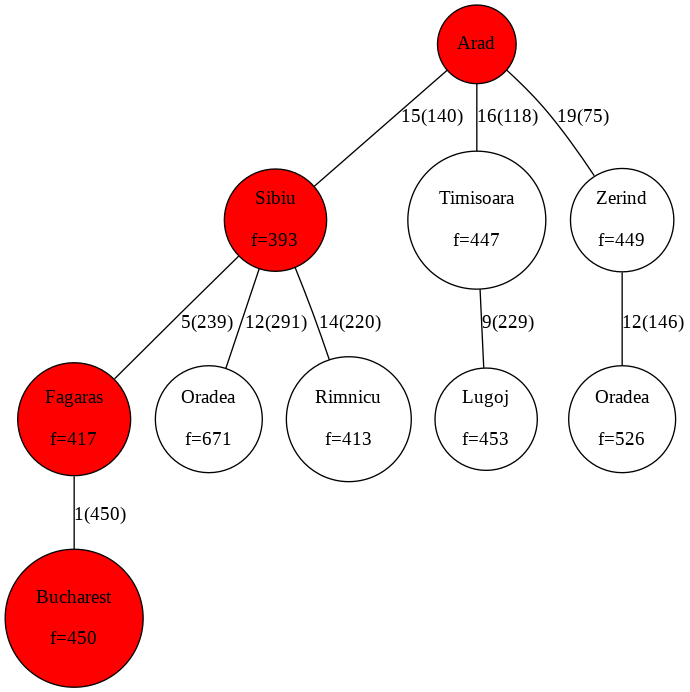

In [ ]:
nodeArad=RouteMap(mapAdj=romania_map, distanceA=aerial_distance_Bucharest,value="inicio",state=initState, operators= operators)
routeAradBucharest=Tree(nodeArad,operators)
objective=routeAradBucharest.breadthFirst(endState)
path=routeAradBucharest.printPath(objective)
graph=routeAradBucharest.draw(path.copy())
tree_image = Image(graph.create_png(), width=500, height=400)
display(tree_image)

#### Primero en profundidad

 Arad
operador:  Sibiu 	 estado: Sibiu
operador:  Fagaras 	 estado: Fagaras
operador:  Bucharest 	 estado: Bucharest


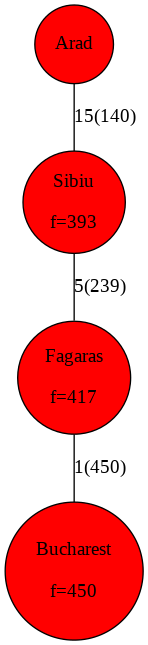

In [ ]:
objective=routeAradBucharest.dephFirst(endState)
path=routeAradBucharest.printPath(objective)
graph=routeAradBucharest.draw(path.copy())
tree_image = Image(graph.create_png(), width=100, height=400)
display(tree_image)

#### Costo uniforme

 Arad
operador:  Sibiu 	 estado: Sibiu
operador:  Fagaras 	 estado: Fagaras
operador:  Bucharest 	 estado: Bucharest


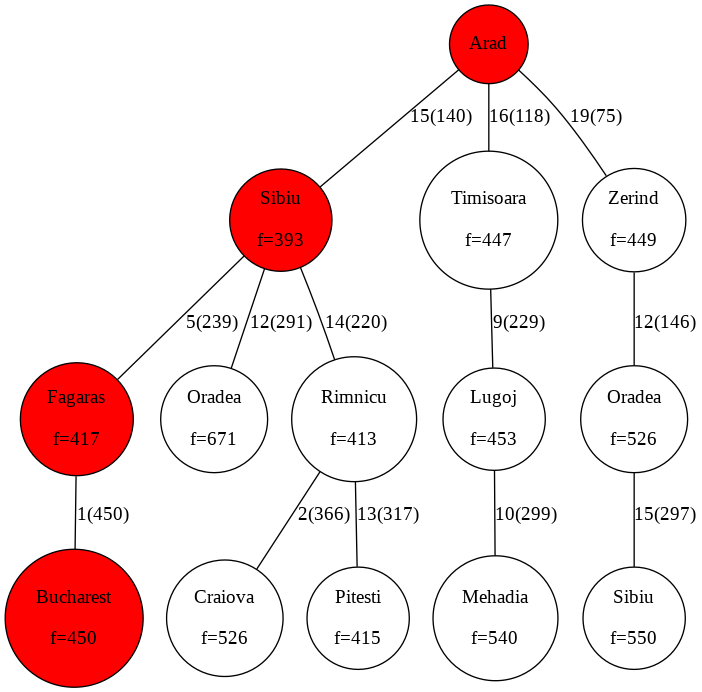

In [ ]:
objective=routeAradBucharest.costUniform(endState)
path=routeAradBucharest.printPath(objective)
graph=routeAradBucharest.draw(path.copy())
tree_image = Image(graph.create_png(), width=500, height=400)
display(tree_image)

#### Primero el mejor

 Arad
operador:  Sibiu 	 estado: Sibiu
operador:  Fagaras 	 estado: Fagaras
operador:  Bucharest 	 estado: Bucharest


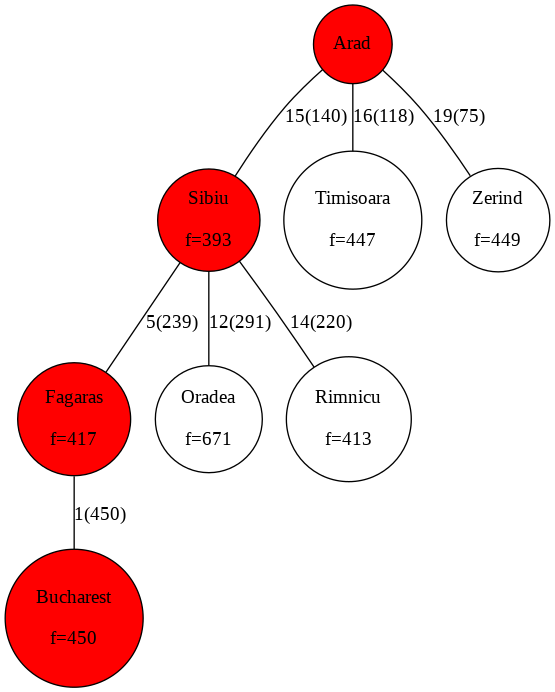

In [ ]:
objective=routeAradBucharest.bestFirst(endState)
path=routeAradBucharest.printPath(objective)
graph=routeAradBucharest.draw(path.copy())
tree_image = Image(graph.create_png(), width=500, height=400)
display(tree_image)

#### A*

 Arad
operador:  Sibiu 	 estado: Sibiu
operador:  Rimnicu 	 estado: Rimnicu
operador:  Pitesti 	 estado: Pitesti
operador:  Bucharest 	 estado: Bucharest


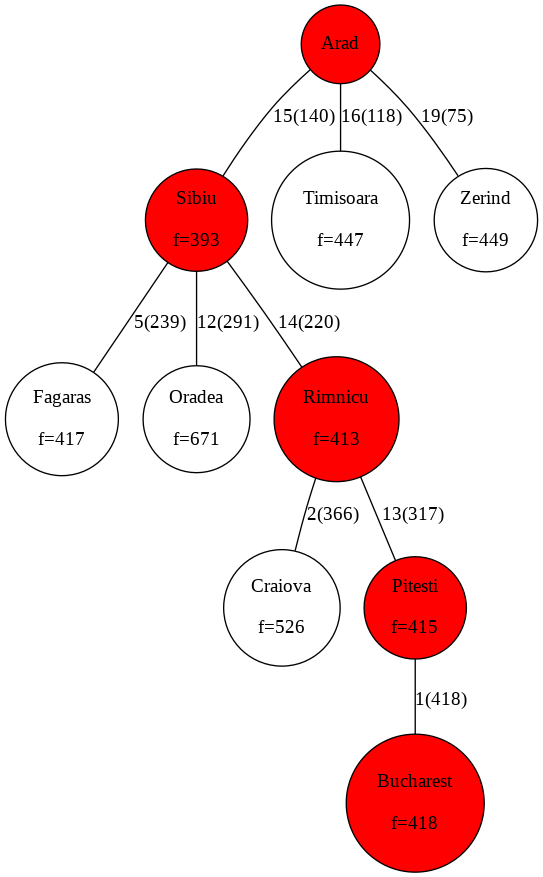

In [ ]:
objective=routeAradBucharest.Aasterisk(endState)
path=routeAradBucharest.printPath(objective)
graph=routeAradBucharest.draw(path.copy())
tree_image = Image(graph.create_png(), width=500, height=500)
display(tree_image)